In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("titanic_test csv")



In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df=pd.read_csv("titanic_train csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

In [8]:
df.shape

(891, 12)

In [9]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

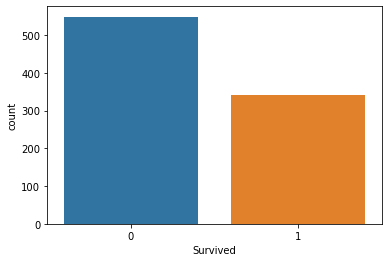

In [13]:
## catagorical attributes
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

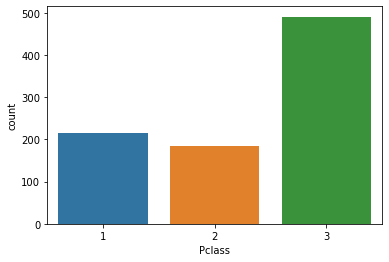

In [14]:
sns.countplot(df['Pclass'])## catagorical attributes

<AxesSubplot:xlabel='Sex', ylabel='count'>

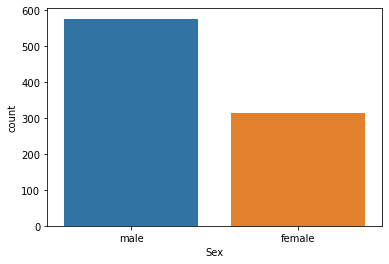

In [15]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

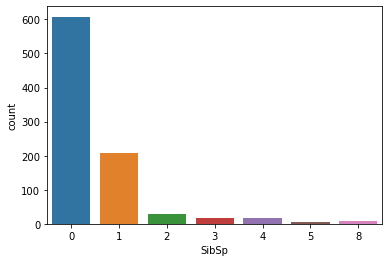

In [16]:
sns.countplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

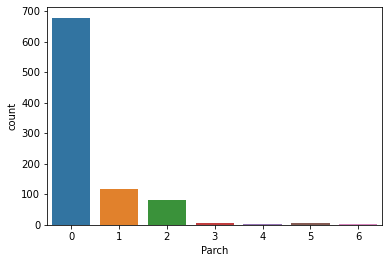

In [17]:
sns.countplot(df['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

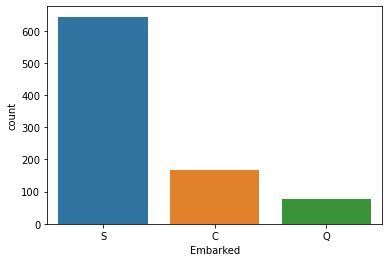

In [18]:
sns.countplot(df['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

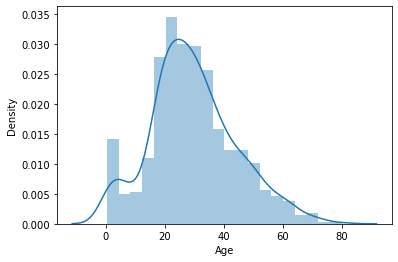

In [19]:
# numericle attributes
sns.distplot(df['Age'])

In [20]:
df.loc[df['Age'].isnull()==True,"Age"]=np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std()
                                     ,size=df.Age.isnull().sum())

<AxesSubplot:xlabel='Age', ylabel='Density'>

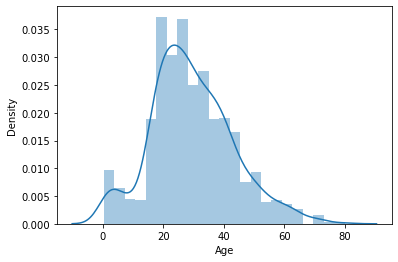

In [21]:
sns.distplot(df['Age'])

In [22]:
df['Age'].isnull().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Density'>

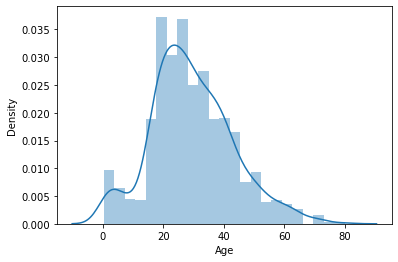

In [23]:
sns.distplot(df['Age'])

In [24]:
df.Survived.isnull().sum()

0

In [27]:
d = len(df[(df['Age'] < 10) & (df['Survived'] == 1)])
f = len(df[(df['Age'] < 10) & (df['Survived'] == 0)])
print(d, f)


38 24


<AxesSubplot:xlabel='Fare', ylabel='Density'>

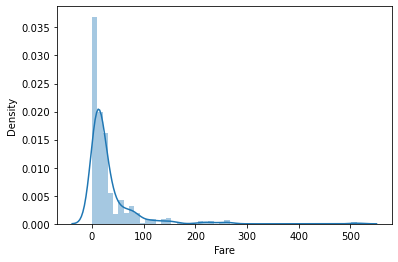

In [28]:
sns.distplot(df['Fare'])

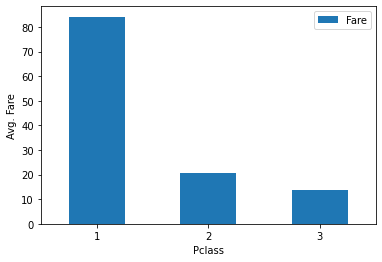

In [30]:
class_fare = df.pivot_table(index = 'Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

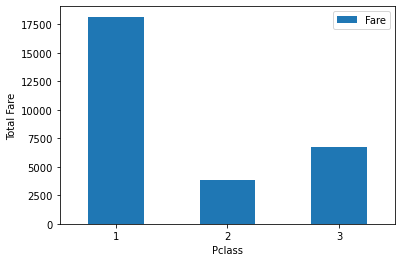

In [31]:
class_fare = df.pivot_table(index = 'Pclass', values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

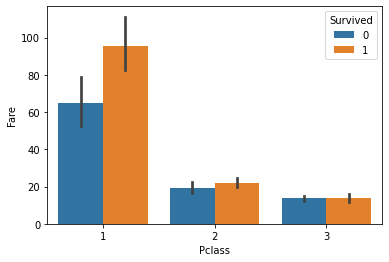

In [33]:
sns.barplot(data=df,x='Pclass',y='Fare',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

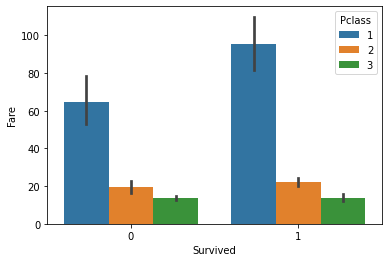

In [34]:
sns.barplot(data=df,x='Survived',y='Fare',hue='Pclass')

# Data Preprocessing

In [35]:
df=df.drop(columns=['Cabin'],axis=1)

# Log transformation for uniform data distribution

<AxesSubplot:xlabel='Fare', ylabel='Density'>

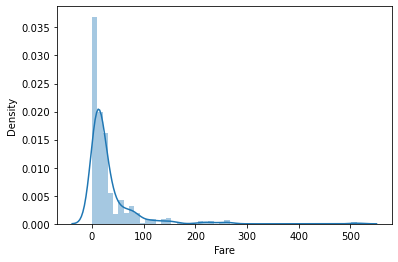

In [36]:
sns.distplot(df['Fare'])

In [38]:
df['Fare'] = np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

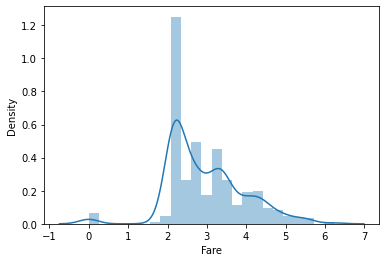

In [39]:
sns.distplot(df['Fare'])

# Correlation Matrix

<AxesSubplot:>

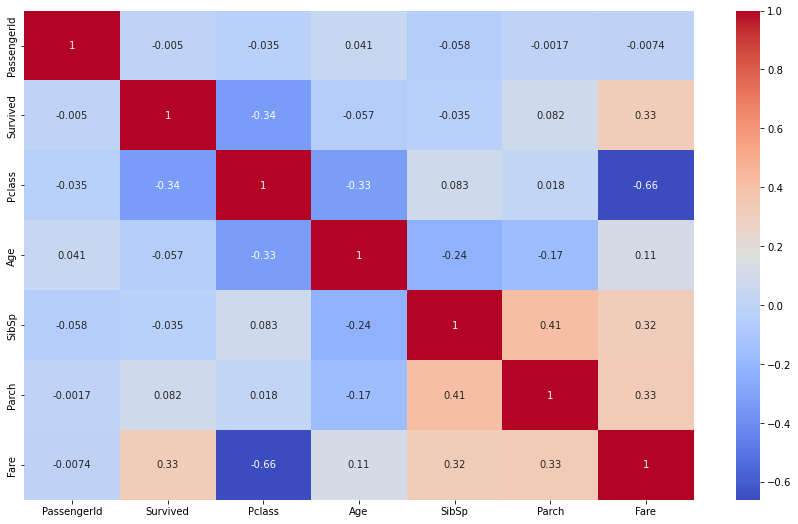

In [40]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [41]:
 df=df.drop("PassengerId",axis=1)

In [42]:
#drop unnecessary column
df=df.drop(columns=['Name','Ticket'],axis=1)

# Lable encoding

In [44]:
df=pd.get_dummies(df)

In [45]:
ytrain=df['Survived']
xtrain=df.drop("Survived",axis=1)

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain,ytrain,random_state=32,test_size=0.2)

In [49]:
xtrain

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
293,3,24.0,0,0,2.287471,1,0,0,0,1
617,3,26.0,1,0,2.839078,1,0,0,0,1
424,3,18.0,1,1,3.054591,0,1,0,0,1
888,3,22.0,1,2,3.196630,1,0,0,0,1
230,1,35.0,1,0,4.436456,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
403,3,28.0,1,0,2.824351,0,1,0,0,1
88,1,23.0,3,2,5.575949,1,0,0,0,1
310,1,24.0,0,0,4.432700,1,0,1,0,0
555,1,62.0,0,0,3.316003,0,1,0,0,1


<AxesSubplot:>

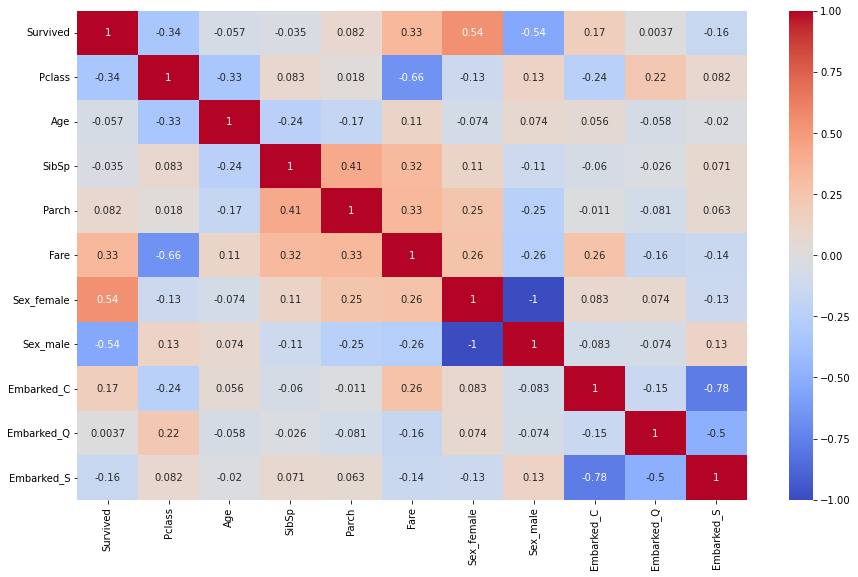

In [52]:
 plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [53]:
lmodel=LogisticRegression()
lmodel.fit(xtrain,ytrain)

LogisticRegression()

# on train data

In [54]:
y=lmodel.predict(xtrain)

In [55]:
accuracy_score(y,ytrain)

0.797752808988764

# on test data

In [56]:
y=lmodel.predict(xtest)
accuracy_score(y,ytest)

0.7932960893854749

# Support vector classifier

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

svmodel = SVC()

svmodel.fit(xtrain, ytrain)

predictions = svmodel.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0
